# Introduction to Data Science
## Homework 5

Student Name: Shyam Nair

Student Netid: smn387
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!


As we all know Naive Bayes uses conditional probability and to calculate that we need count(c) that is count of the occerence of event c. If in case we did not have event c in our training data but we encounter one in the testing data then c will be labelled as 0. As per the conditional probability formula, count(e,c)/ count(c) will give answer 0. Therefore as the algorithm has never learnt it, the new word will be classified wrongly. For eg, if we have a set of words which are classified as spam or ham. And in the test data we encounter with a new word say "password(which is a part of spam)" which is not a part of the training data then that word will be wrongly classified as ham. In order to classifiy it correctly we perform Laplace smoothing (usually k = 1) on it and hence the count of every word increases by 1. Hence the word "password" will be correctly classified as spam.


### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [62]:
import pandas as pd
data = pd.DataFrame(pd.read_csv("imdb.csv"))

2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [63]:
# Code here
data['Class'] = pd.Series(data['Class'] == "P", dtype=int)

In [64]:
data.head(5)

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [65]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
bin_vect = CountVectorizer(stop_words = stopwords, binary=True, ngram_range=(1, 2))
bin_vect.fit(X_train)

X_train_bin = bin_vect.transform(X_train)
X_test_bin = bin_vect.transform(X_test)

tfidf_vect = TfidfVectorizer(stop_words = stopwords, binary = True, ngram_range=(1, 2))
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


In [67]:
#print(X_train_tfidf)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [68]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

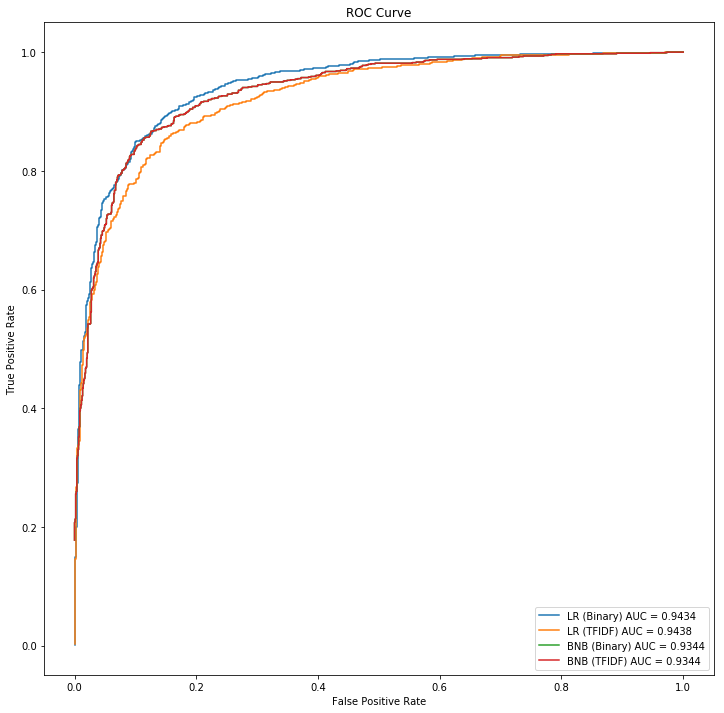

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# Code here
for model, model_label in [(LogisticRegression(), "LR"), (BernoulliNB(), "BNB")]:
    for train, test, method in [(X_train_bin, X_test_bin, 'Binary'), (X_train_tfidf, X_test_tfidf, 'TFIDF')]:
        model.fit(train, Y_train)
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test_bin)[:,1])
        auc = metrics.roc_auc_score(Y_test, model.predict_proba(test)[:, 1])
        plt.plot(fpr, tpr, label=model_label + " (" + method + ") AUC = " + str(round(auc, 4)))
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        
plt.legend()

Explanation here!
Logistic Regression (tfidf) model performs better than the Naive Bayes model. Naive bayes assumes that every parameter is mutually independent which is why it assigns equal weight to even those features which are correlated to each other. Whereas, Logistic Regression assigns them lower weights. As the plot of logistic regression is better, we can infer that there are correlated features in our dataset. Also, the dataset is huge. The Logreg model might have overfitted if the dataset was small, resulting in lower performance. TFIDF Vectorizer performs better thatn Count Vectorizer since CV only counts the word frequencies whereas TFIDF considers the word frequencies as well as the number of times that word is used in the document, i.e., tfidf vectorizer gives less importance to words which are repeated several times. Both binary and tfidf NB has a similar plot. We use binary vectorizers in which all the non-zero counts are converted to 1. This makes both the models behave similar to Bernoulli Naive Bayes model giving the same output.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [70]:
# Code here to display 5 incorrect reviews.
import numpy as np
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, Y_train)
pred = logreg.predict(X_test_tfidf)

pos_class = np.where(Y_test == 1)[0]
incorrect_reviews = np.where(pred[pos_class] != Y_test[pos_class])[0]
print(incorrect_reviews.shape)
for i, c in X_test[incorrect_reviews].iteritems():
    print(i, c)

(950,)
(0, nan)
(1, nan)
(2, nan)
(3, nan)
(4, "'The title says it all. Tail Gunner Joe was a tag given to the Senator which relied upon the ignorance of the public about World War II aircraft. The rear facing moving guns relied upon a latch that would prevent the rear gunner from shooting off the tail of the airplane by preventing the gun from firing when it pointed at the tail. When the Senator was practicing on the ground one day he succeeded in shooting off the tail of the airplane. He couldnt have done that if the gun had been properly aligned. The gunnery officer responsible for that admitted in public before a camera that he was responsible -- he had made the error not the Senator. The fact that the film did not report that fact shows how one-sided it is. This film was designed to do one thing destroy the reputation of a complex person. A much better program was the PBS special done on him. He was a hard working intelligent ambitious politician who overcame extraordinary disadva

(389, nan)
(390, nan)
(392, nan)
(395, nan)
(396, nan)
(397, nan)
(398, nan)
(399, nan)
(400, "'This is the most ludicrous and laughable thriller Ive ever seen. Oh....where to start.... Plot (what little there is): Clayton Beresford Jr. (Hayden Christensen) a young billionaire with a bad heart is desperately in need of a transplant. Clay has been secretly engaged to his mothers PA Samantha played by Jessica Alba. On the night that these two secretly get married it just so happens that a heart donor with the same rare blood type is found. Go and figure the odds of that one! Once on the operating table Clay finds out the anesthesia isnt working and he can feel everything and hear everything. Fortunately Clay seems to be able to filter out the pain of a razor sharp scalpel cutting open his chest by simply concentrating on his memories of Samantha which we are told hes doing through an annoying voice-over which never seems to stop. If you didnt burst out in laughter yet you will surely sta

Explanation for the 5 reviews chosen here!
11: Here the review is actually a positive review and the user seems to have liked the picture. But he uses a lot of negative words which is why the review has been classified as a negative review. 

22: In this review too, the reviewer actually liked the movie and is praising the humor of the movie using adjectives that might be classified as negative words because of which the review has been misclassified.

25: This is not a review. Here the reviewer has explained the plot using his point of view because of which the review has been misclassified

44: The same reason goes for this too. The reviewer actually liked the movie and has explained the plot using his point of view.

49: This is actually a positive review and the reviewer has criticized the "people" who have rated it poorly and thus the review is a positive one. Because of this the review has been classified as a negative review.